Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
set.seed(1)
library('tidymodels')
library('tidyverse')


Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ───────────────────────

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train %>% glimpse()



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 5, 3, 6, 10, 11, 3, 7, 7, 7,…
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 109, 88, 92, 122, 138,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 75, 58, 92, 78, 76, 64, 84…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 26, 11, 0, 31, 0, 25, 0, 18,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 54, 0, 0, 0, 70, 0, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 36.0, 24.8, 19.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.546, 0.2…
$ Age                      <dbl> 31, 21, 30, 29, 57, 60, 22, 28, 45, 35, 26, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:** Since the variable 'Outcome' is a factor variable with values 0 and 1, it is not suitable to be used as the outcome variable in a regression model. Instead, it is more appropriate for classification problems, where the goal is to predict the class label (0 or 1) of a sample.

For a regression model, continuous variables like 'BMI' and 'Glucose' are more suitable as outcome variables. These variables represent continuous measurements and can be used to predict a continuous target value. Therefore, 'BMI' and 'Glucose' are better candidates for use as outcome variables in regression models."


In [4]:
diabetes_train %>% str()

tibble [576 × 9] (S3: tbl_df/tbl/data.frame)
 $ Pregnancies             : num [1:576] 1 1 5 10 10 5 3 6 10 11 ...
 $ Glucose                 : num [1:576] 85 89 116 115 139 109 88 92 122 138 ...
 $ BloodPressure           : num [1:576] 66 66 74 0 80 75 58 92 78 76 ...
 $ SkinThickness           : num [1:576] 29 23 0 0 0 26 11 0 31 0 ...
 $ Insulin                 : num [1:576] 0 94 0 0 0 0 54 0 0 0 ...
 $ BMI                     : num [1:576] 26.6 28.1 25.6 35.3 27.1 36 24.8 19.9 27.6 33.2 ...
 $ DiabetesPedigreeFunction: num [1:576] 0.351 0.167 0.201 0.134 1.441 ...
 $ Age                     : num [1:576] 31 21 30 29 57 60 22 28 45 35 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

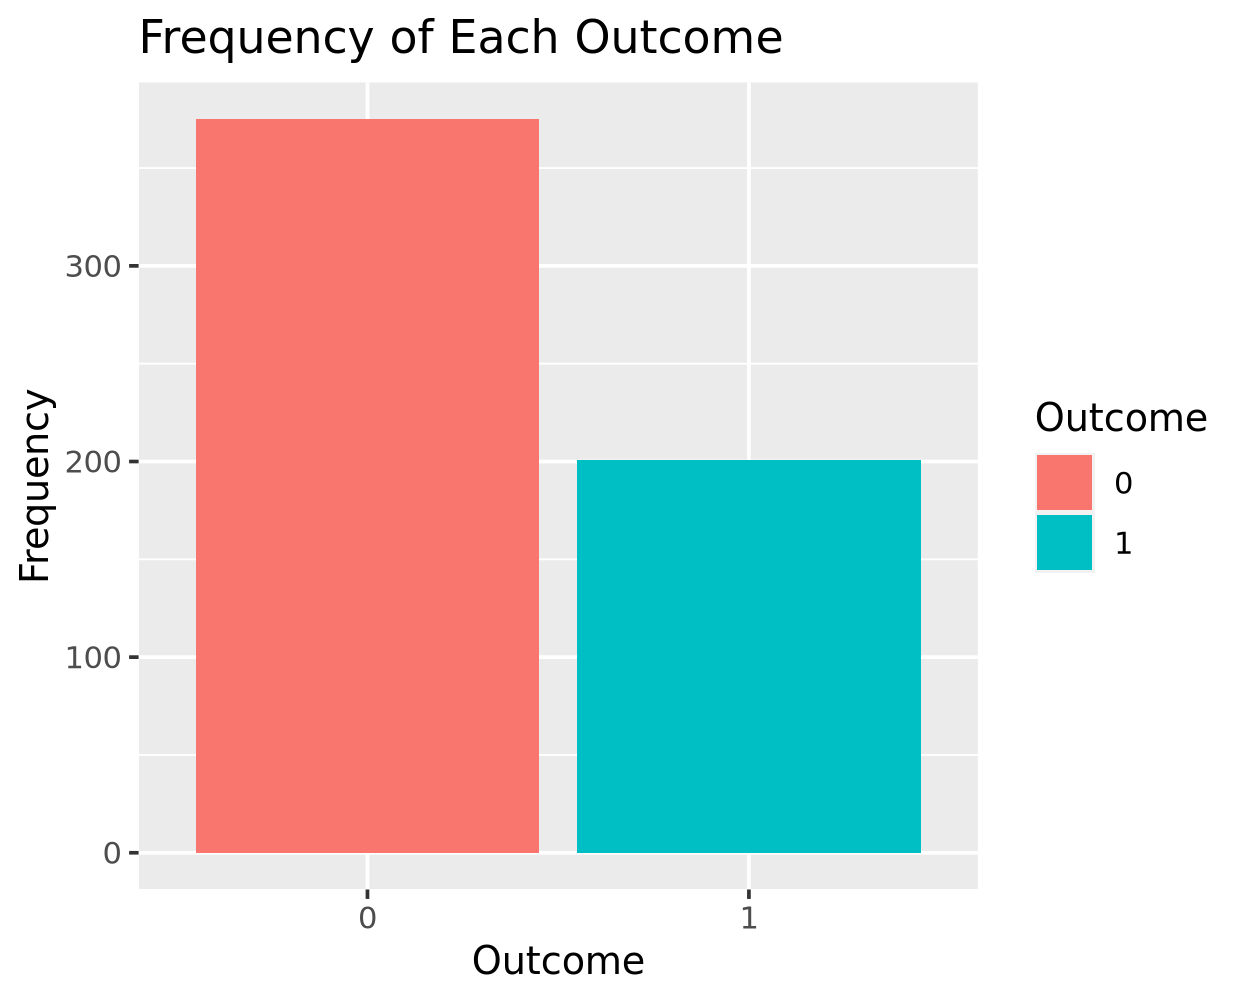

In [5]:
diabetes_train %>% ggplot(aes(x = Outcome))+
                    geom_bar(aes(fill = Outcome))+
                    labs(title = "Frequency of Each Outcome",
                           x = "Outcome",
                           y = "Frequency")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** NO, the data is an imbalanced data set.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

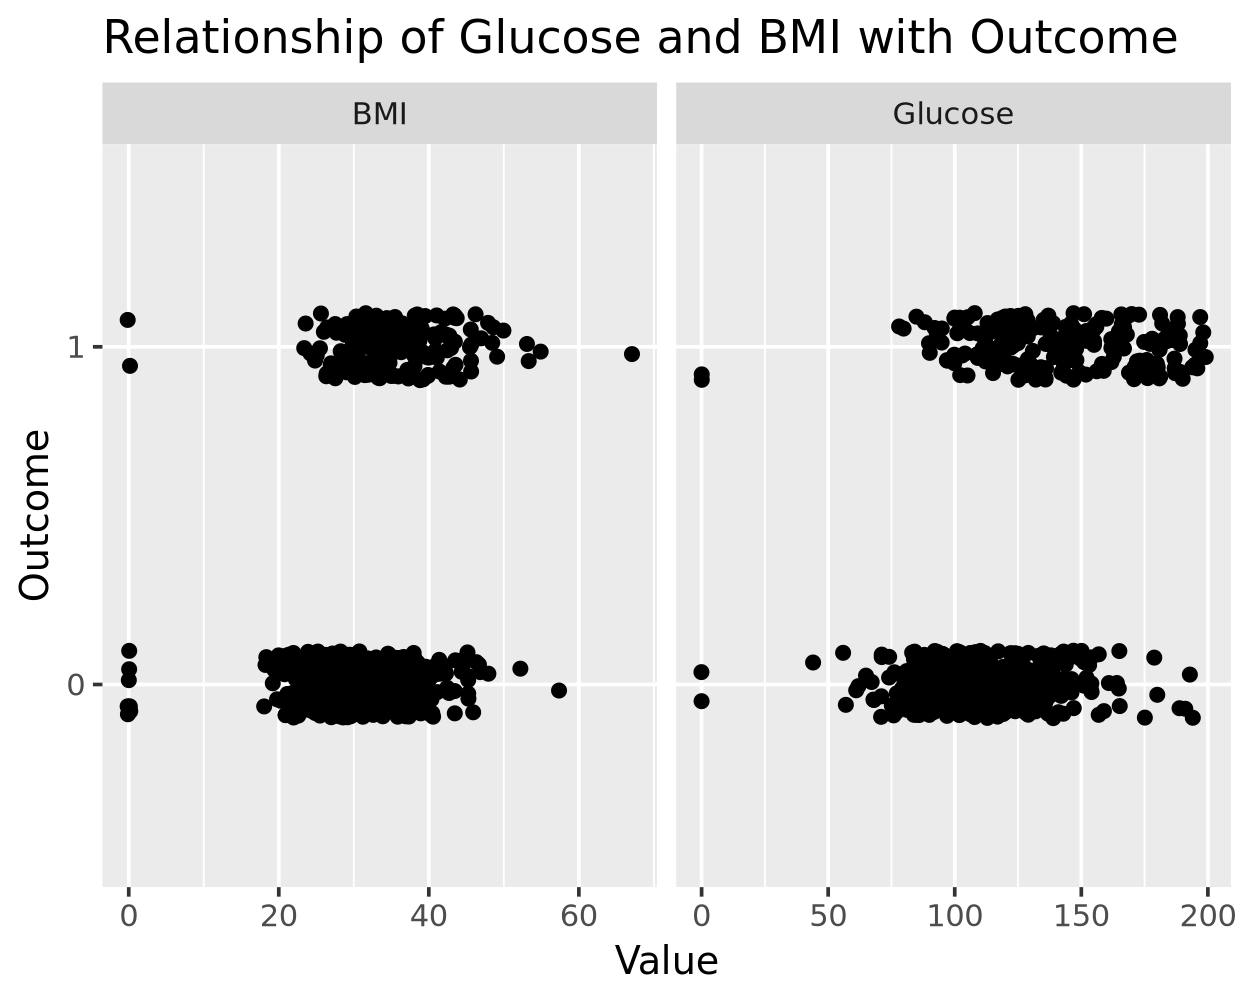

In [7]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(width = 0.2, height = 0.1) +  
  facet_wrap(~name, ncol = 2, scales = 'free_x') +  
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Value",
       y = "Outcome")


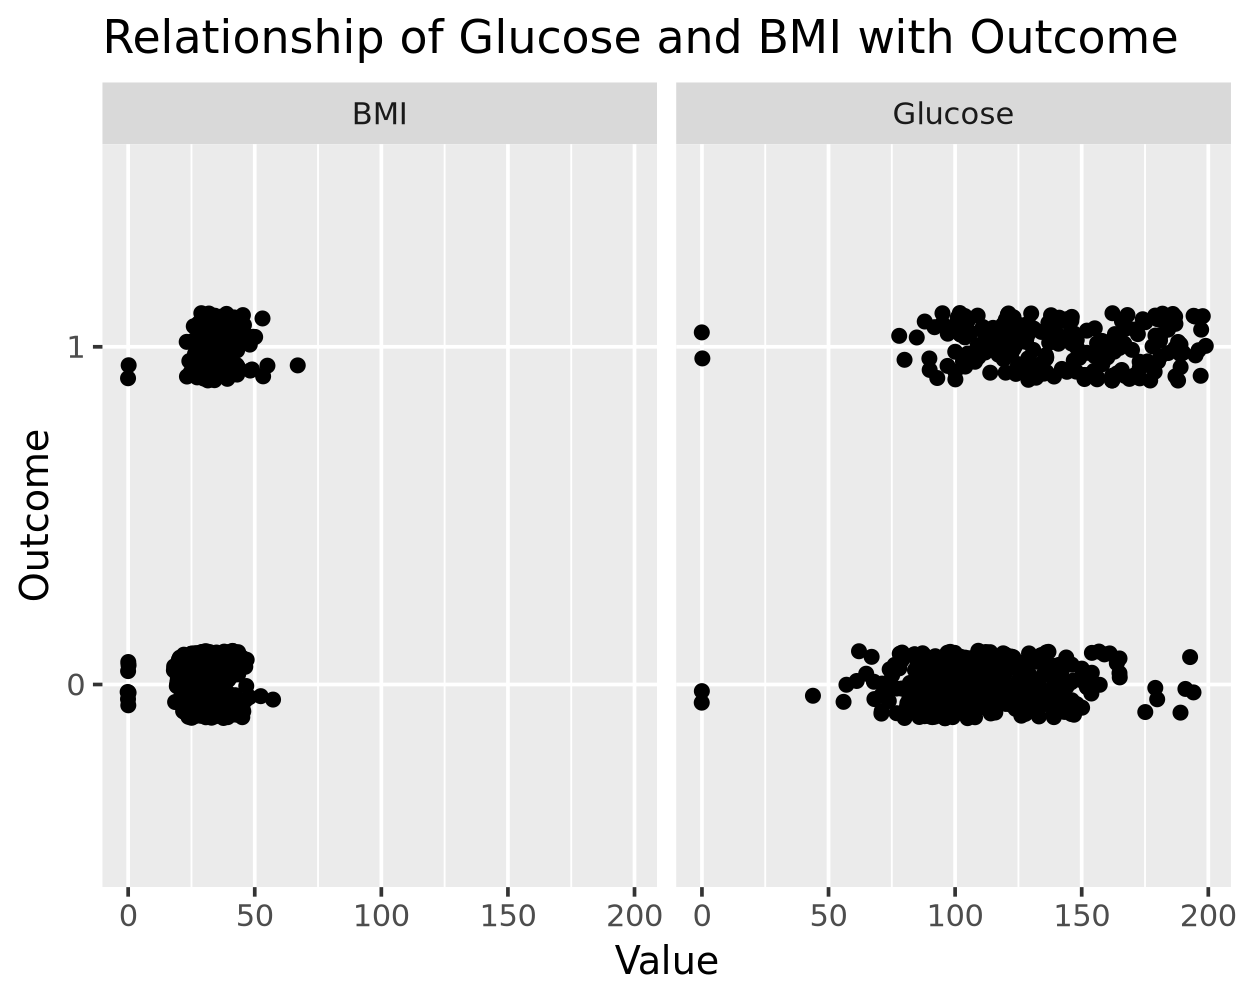

In [8]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(width = 0.2, height = 0.1) +  
  facet_wrap(~name, ncol = 2) +  
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Value",
       y = "Outcome")


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** The plot will share the same x-axis scale for both BMI and other variable, however, if scales = 'free_x' taken out then every feature will be appeared regarding their scale range.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [9]:
model <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial)

model %>% summary()



Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.537655   0.701541 -10.744  < 2e-16 ***
BMI          0.077161   0.015120   5.103 3.34e-07 ***
Glucose      0.035016   0.003785   9.252  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 580.87  on 573  degrees of freedom
AIC: 586.87

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred <- augment(model, newdata = diabetes_test)
diabetes_test_wPred %>% head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
4,110,92,0,0,37.6,0.191,30,0,-0.78464085
7,107,74,0,0,29.6,0.254,31,1,-1.50697751
1,103,30,38,83,43.3,0.183,33,0,-0.58993447
1,115,70,30,96,34.6,0.529,32,1,-0.84104424
3,126,88,41,235,39.3,0.704,27,0,-0.09321138
8,99,84,0,0,35.4,0.388,50,0,-1.33957099


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [11]:
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(.pred_class = ifelse(.fitted < 0.5, 0, 1))

conf_mat <- table(diabetes_test_wPred$Outcome, diabetes_test_wPred$.pred_class)
conf_mat

   
      0   1
  0 118   7
  1  41  26

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data? 41+26 = 67
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 26
- How many individuals predicted to have diabetes did not have diabetes? 7

**Answer:**